In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from toolz.curried import *

import gc_model as gc
import hic_analysis as hic
import visualize

In [34]:
M = 2
weights_params = (M**2 + M) // 2

lambdas = np.load(f'./output/lambda_probabilities_{M}states.npy')
weights = gc.normalize(gc.triangle_to_symmetric(M, np.random.uniform(size=weights_params)))
alpha = np.load(f'./output/model_distance_decay_power_value_{M}states.npy')

In [35]:
random_mat = gc.generate_interactions_matrix(lambdas, weights, alpha)

In [5]:
fit_lambdas, fit_weights, fit_alpha = gc.fit(random_mat, number_of_states=M)

KeyboardInterrupt: 

In [ ]:
recons_mat = gc.generate_interactions_matrix(fit_lambdas, fit_weights, fit_alpha)

In [ ]:
stats.pearsonr(hic.remove_nan(hic.normalize_distance(recons_mat)), hic.remove_nan(hic.normalize_distance(random_mat)))

In [6]:
def sort_weights(weights):
    self_weights = np.diag(weights)
    M = self_weights.size
    weights_order = np.argsort(self_weights)
    sorted_weights = np.empty_like(weights)
    for i in range(M):
        w_i = weights_order[i]
        for j in range(M):
            w_j = weights_order[j]
            sorted_weights[i, j] = weights[w_i, w_j]
    return sorted_weights, weights_order

In [7]:
def hic_corr(m1, m2):
    return stats.pearsonr(hic.remove_nan(hic.normalize_distance(m1)), hic.remove_nan(hic.normalize_distance(m2)))

In [ ]:
sort_weights(weights)

In [ ]:
sort_weights(fit_weights)

In [ ]:
fit_lambdas2, fit_weights2, fit_alpha2 = gc.fit(random_mat, number_of_states=M)
recons_mat2 = gc.generate_interactions_matrix(fit_lambdas2, fit_weights2, fit_alpha2)

In [ ]:
sort_weights(fit_weights2)

In [ ]:
fit_lambdas3, fit_weights3, fit_alpha3 = gc.fit(random_mat, number_of_states=M)
recons_mat3 = gc.generate_interactions_matrix(fit_lambdas2, fit_weights2, fit_alpha2)

In [ ]:
sort_weights(fit_weights3)

In [ ]:
hic_corr(recons_mat3, recons_mat)

In [52]:
weights_diag = gc.normalize(np.diag(np.random.uniform(size=M)))
random_diag_mat = gc.generate_interactions_matrix(lambdas, weights_diag, alpha)

In [ ]:
fit_diag = [ gc.fit(random_diag_mat, number_of_states=M) for i in range(3)]

In [ ]:
[ sort_weights(f[1]) for f in fit_diag ]

In [ ]:
sort_weights(weights_diag)

In [ ]:
fit_diag_weights1 = fit_diag[0][1]
forced_diag_weights = gc.normalize(np.diag(np.diagonal(fit_diag_weights1)))

In [ ]:
recons_diag_mat1 = gc.generate_interactions_matrix(*fit_diag[0])
recons_forced_diag_mat1 = gc.generate_interactions_matrix(fit_diag[0][0], forced_diag_weights, fit_diag[0][2])

In [ ]:
hic_corr(recons_diag_mat1, random_diag_mat)

In [ ]:
hic_corr(recons_forced_diag_mat1, random_diag_mat)

In [62]:
small_random_mat = gc.generate_interactions_matrix(lambdas[10:20], weights, alpha)
fit_small = [ gc.fit(small_random_mat, number_of_states=M) for i in range(50) ]

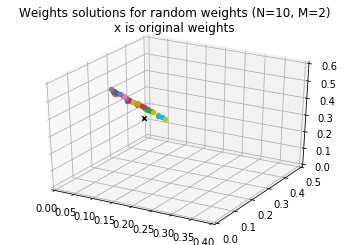

In [107]:
pts = [ extract_tril(sort_weights(f[1])[0]) for f in fit_small ]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
[ ax.scatter(*p) for p in pts]
ax.scatter(*extract_tril(sort_weights(weights)[0]), marker='x', c='k')
plt.title("Weights solutions for random weights (N=10, M=2)\nx is original weights")
ax.set_xlim(0, 0.4)
ax.set_ylim(0, 0.5)
ax.set_zlim(0, 0.6)
plt.show()

In [38]:
sort_weights(weights)

(array([[0.054776  , 0.36378742],
        [0.36378742, 0.21764916]]), array([1, 0]))

In [ ]:
lambdas[10:20, [2,1,0]]

In [ ]:
fit_small_mat = gc.generate_interactions_matrix(fit_small_lambdas, fit_small_weights, fit_small_alpha)

In [ ]:
hic_corr(small_random_mat, fit_small_mat)

In [169]:
small_diag_mat = gc.generate_interactions_matrix(lambdas[10:20], weights_diag, alpha)
fit_small_diag = [ gc.fit(small_diag_mat, number_of_states=M) for i in range(50) ]

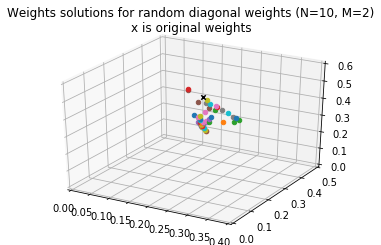

In [170]:
pts = [ extract_tril(sort_weights(f[1])[0]) for f in fit_small_diag ]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
[ ax.scatter(*p) for p in pts]
ax.scatter(*extract_tril(sort_weights(weights_diag)[0]), marker='x', c='k')
plt.title("Weights solutions for random diagonal weights (N=10, M=2)\nx is original weights")
ax.set_xlim(0, 0.4)
ax.set_ylim(0, 0.5)
ax.set_zlim(0, 0.6)
plt.show()

In [ ]:
[ hic_corr(gc.generate_interactions_matrix(*f), small_diag_mat) for f in fit_small_diag ]

In [65]:
input_data = np.load('Rao2015_chr20_20000.npy')
fit_input = [gc.fit(input_data[10:20, :][:, 10:20], number_of_states=2) for i in range(50)]

In [32]:
extract_tril = lambda a: a[np.tril_indices_from(a)]

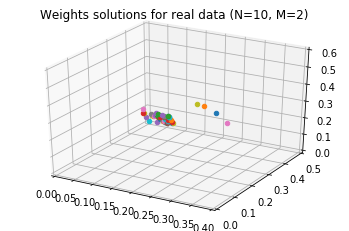

In [102]:
from mpl_toolkits.mplot3d import Axes3D
pts = [ extract_tril(sort_weights(f[1])[0]) for f in fit_input ]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
[ ax.scatter(*p) for p in pts]
plt.title("Weights solutions for real data (N=10, M=2)")
ax.set_xlim(0, 0.4)
ax.set_ylim(0, 0.5)
ax.set_zlim(0, 0.6)
plt.show()

In [77]:
def create_mask(n, i):
    m = np.zeros(n)
    m[i] = 1
    return m

In [78]:
random_lambdas = np.array([ create_mask(M, i) for i in np.random.randint(0, M, size=10) ])

In [80]:
true_random_mat = gc.generate_interactions_matrix(random_lambdas, weights, alpha)

In [81]:
fit_random = [gc.fit(true_random_mat, number_of_states=2) for i in range(50)]

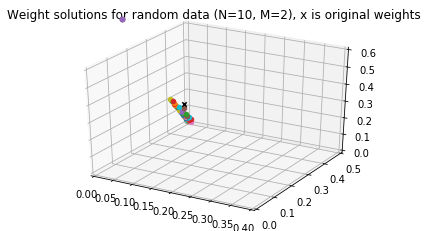

In [103]:
from mpl_toolkits.mplot3d import Axes3D
pts = [ extract_tril(sort_weights(f[1])[0]) for f in fit_random ]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
[ ax.scatter(*p) for p in pts]
plt.title("Weight solutions for random data (N=10, M=2), x is original weights")
ax.scatter(*extract_tril(sort_weights(weights)[0]), marker='x', c='k')
ax.set_xlim(0, 0.4)
ax.set_ylim(0, 0.5)
ax.set_zlim(0, 0.6)
plt.show()

In [95]:
true_random_diag_mat = gc.generate_interactions_matrix(random_lambdas, weights_diag, alpha)

In [96]:
fit_random_diag = [gc.fit(true_random_diag_mat, number_of_states=2) for i in range(50)]

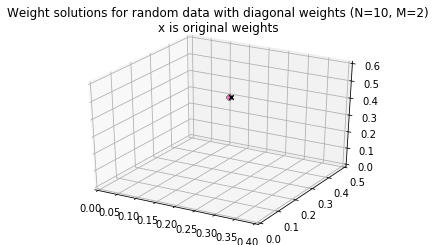

In [105]:
from mpl_toolkits.mplot3d import Axes3D
pts = [ extract_tril(sort_weights(f[1])[0]) for f in fit_random_diag ]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
[ ax.scatter(*p) for p in pts]
plt.title("Weight solutions for random data with diagonal weights (N=10, M=2)\nx is original weights")
ax.scatter(*extract_tril(sort_weights(weights_diag)[0]), marker='x', c='k')
ax.set_xlim(0, 0.4)
ax.set_ylim(0, 0.5)
ax.set_zlim(0, 0.6)
plt.show()

In [185]:
diag_noise = 0.001
weights_noisy_diag = gc.normalize(diag_noise * np.random.uniform(1, 9) * np.full((M, M), 1) + weights_diag)

In [188]:
true_random_noisy_diag_mat = gc.generate_interactions_matrix(lambdas, weights_noisy_diag, alpha)
fit_random_noisy_diag = [gc.fit(true_random_noisy_diag_mat, number_of_states=M) for i in range(5)]

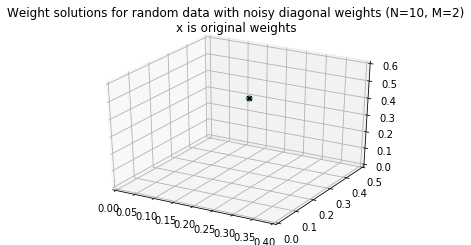

In [189]:
from mpl_toolkits.mplot3d import Axes3D
pts = [ extract_tril(sort_weights(f[1])[0]) for f in fit_random_noisy_diag ]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
[ ax.scatter(*p) for p in pts]
plt.title("Weight solutions for random data with noisy diagonal weights (N=10, M=2)\nx is original weights")
ax.scatter(*extract_tril(sort_weights(weights_noisy_diag)[0]), marker='x', c='k')
ax.set_xlim(0, 0.4)
ax.set_ylim(0, 0.5)
ax.set_zlim(0, 0.6)
plt.show()

In [186]:
weights_noisy_diag

array([[0.65499114, 0.0063584 ],
       [0.0063584 , 0.33229207]])

In [190]:
pts

[array([0.3322009 , 0.00661187, 0.65457535]),
 array([0.33204462, 0.00661342, 0.65472854]),
 array([0.33224563, 0.00661143, 0.65453151]),
 array([0.33187496, 0.0066151 , 0.65489485]),
 array([0.33139507, 0.00661987, 0.6553652 ])]

In [196]:
fit_input_full = [gc.fit(input_data, number_of_states=M) for i in range(5)]

In [197]:
bulk_weights_diag = [gc.normalize(np.diag(np.random.uniform(size=M))) for i in range(5) ]

In [198]:
    def fit_bulk(weights, lambdas, alpha, count, number_of_states=M):
        mat = gc.generate_interactions_matrix(lambdas, weights, alpha)
        return [gc.fit(mat, number_of_states=number_of_states) for i in range(count)]

In [331]:
fit_bulk_weights_fake = [ fit_bulk(w, random_lambdas, alpha, count=50) for w in bulk_weights_diag ]

In [244]:
def plot_solutions(weights, reference=None, description=""):
    weights2point = lambda x: extract_tril(sort_weights(x)[0])
    pts = [ weights2point(w) for w in weights ]
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    [ ax.scatter(*p) for p in pts]
    title = f"Weight solutions {description}"
    if reference is not None:
        title += "\nx is original weights"
        ax.scatter(*weights2point(reference), marker='x', c='k')
    plt.title(title)
    ax.set_xlim(0, 0.4)
    ax.set_ylim(0, 0.5)
    ax.set_zlim(0, 0.6)
    plt.show()

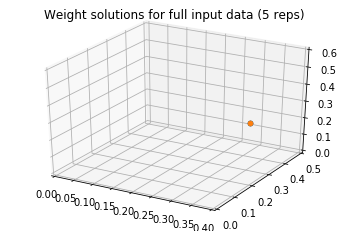

In [249]:
plot_solutions(pluck(1, fit_input_full), description="for full input data (5 reps)")

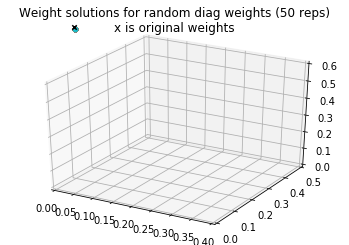

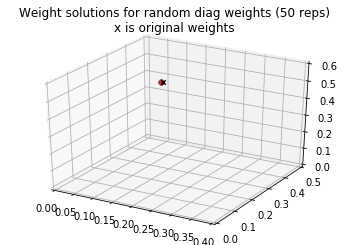

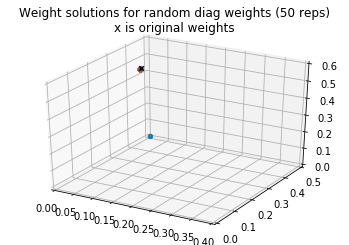

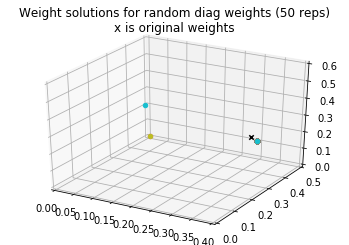

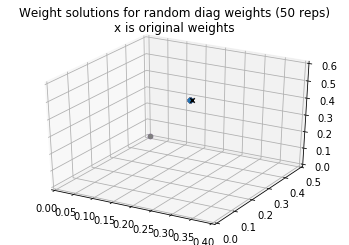

[None, None, None, None, None]

In [334]:
[ plot_solutions(pluck(1, w_fit), reference=w_reference, description="for random diag weights (50 reps)") for w_fit, w_reference in zip (fit_bulk_weights_fake, bulk_weights_diag)]

In [262]:
fit_bulk_weights = [ fit_bulk(w, lambdas, alpha, count=5) for w in bulk_weights_diag ]

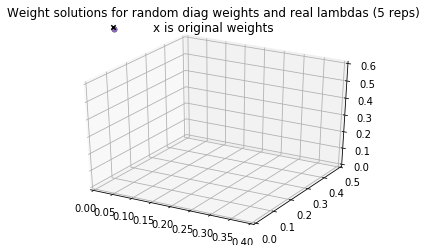

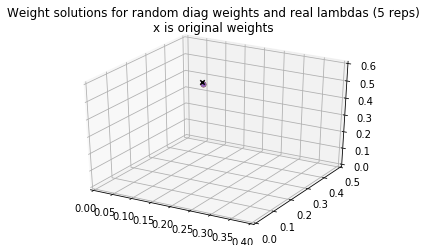

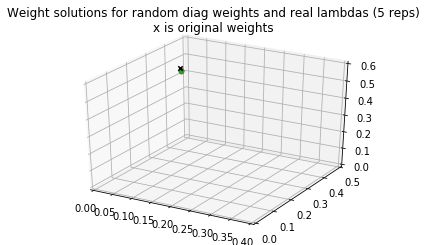

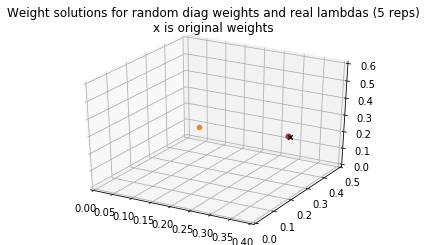

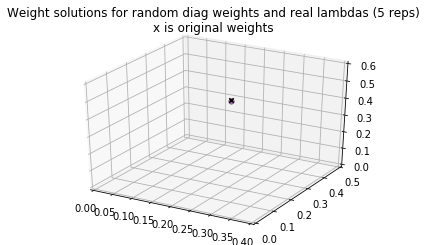

[None, None, None, None, None]

In [263]:
[ plot_solutions(pluck(1, w_fit), reference=w_reference, description="for random diag weights and real lambdas (5 reps)") for w_fit, w_reference in zip (fit_bulk_weights, bulk_weights_diag)]

In [274]:
list(pluck(1, fit_bulk_weights[0]))

[array([[0.06596072, 0.00924791],
        [0.00924791, 0.91554345]]), array([[0.91556366, 0.00924812],
        [0.00924812, 0.0659401 ]]), array([[0.91554475, 0.00924793],
        [0.00924793, 0.06595939]]), array([[0.0659489 , 0.00924803],
        [0.00924803, 0.91555504]]), array([[0.91554305, 0.00924791],
        [0.00924791, 0.06596113]])]

In [280]:
eig, _ = np.linalg.eig(random_lambdas @ bulk_weights_diag[0] @ random_lambdas.T)

In [278]:
np.array([5.6, 0.27]) / (5.6 + 0.27)

array([0.95400341, 0.04599659])

In [284]:
fit_no_alpha = fit_bulk(weights, lambdas[10:20], 0, count=50)

In [288]:
plot_solutions(pluck(1, fit_no_alpha), weights)

In [333]:
%matplotlib inline

In [295]:
eigvals, eigvecs = np.linalg.eig(weights)

In [300]:
eigvecs @ np.diag(eigvals) @ eigvecs.T

array([[0.21764916, 0.36378742],
       [0.36378742, 0.054776  ]])

In [302]:
np.diag(eigvals)

array([[ 0.50900368,  0.        ],
       [ 0.        , -0.23657852]])

In [330]:
dots = compose(np.sort, list, pluck(0), map(np.linalg.eig), pluck(1))(fit_no_alpha)
plt.scatter(dots[:, 0], dots[:, 1])

In [319]:
almost_diag = [x for x in pluck(1, fit_no_alpha) if x[0, 1] < 0.01 ][0]

In [345]:
while True:
    weights_psd = gc.normalize(gc.triangle_to_symmetric(M, np.random.uniform(size=weights_params)))
    weights_psd_eig, _ = np.linalg.eig(weights_psd)
    if np.all(weights_psd_eig > 0):
        break

In [375]:
fit_no_alpha_psd = fit_bulk(weights_psd, random_lambdas, alpha, count=50)

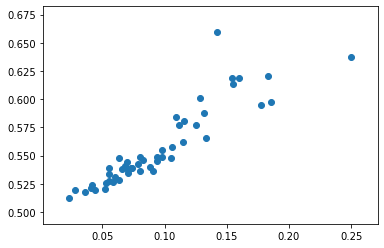

In [386]:
dots = compose(np.sort, list, pluck(0), map(np.linalg.eig), pluck(1))(fit_no_alpha_psd)
plt.scatter(dots[:, 0], dots[:, 1])

In [373]:
fit_no_alpha_psd_diag = fit_bulk(gc.normalize(np.diag(weights_psd_eig)), random_lambdas, alpha, count=50)

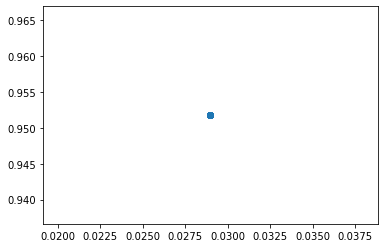

In [374]:
dots = compose(np.sort, list, pluck(0), map(np.linalg.eig), pluck(1))(fit_no_alpha_psd_diag)
plt.scatter(dots[:, 0], dots[:, 1])

In [367]:
np.diag(weights_psd_eig)

array([[0.01459994, 0.        ],
       [0.        , 0.50744404]])

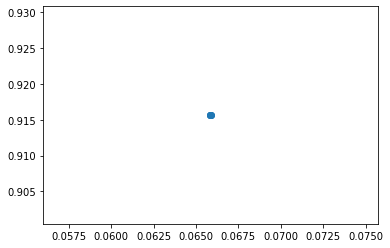

In [371]:
dots = compose(np.sort, list, pluck(0), map(np.linalg.eig), pluck(1))(fit_bulk_weights[0])
plt.scatter(dots[:, 0], dots[:, 1])

In [372]:
gc.normalize(np.diag(weights_psd_eig))

array([[0.02796689, 0.        ],
       [0.        , 0.97203311]])

In [497]:
def sort_by_weight(fit_results):
    l, w, a = fit_results
    w_sorted, order = sort_weights(w)
    
    return l[:, order], w_sorted, a

In [387]:
fit_bulk_weights_fake_3states = [ fit_bulk(w, random_lambdas, alpha, count=50, number_of_states=M+1) for w in bulk_weights_diag ]

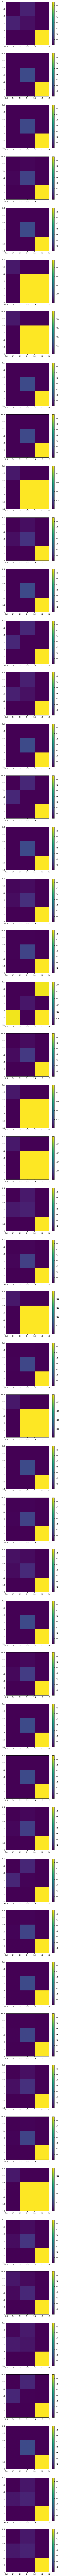

In [502]:
fit_bulk_weights_fake_3states_sorted = list(map(sort_by_weight, fit_bulk_weights_fake_3states[0]))
fit_bulk_weights_fake_3statesk_weights =  list(pluck(1, fit_bulk_weights_fake_3states_sorted))
plt.figure(figsize=(8, 6 * len(fit_bulk_weights_fake_3statesk_weights)))
for i, d in enumerate(fit_bulk_weights_fake_3statesk_weights):
    ax = plt.subplot(len(fit_bulk_weights_fake_3statesk_weights), 1, i+1)
    m = ax.imshow(d)
    plt.colorbar(m)

In [447]:
groups = []
for w_id, d in enumerate(fit_bulk_weights_fake_3statesk_weights):
    group = None
    for i, g in enumerate(groups):
        rep = g['rep']
        corr = stats.pearsonr(rep.flatten(), d.flatten())[0]
        if corr > 0.98:
            group = i
            break
    if group is None:
        groups.append(dict(rep=d, count=1, ids=[w_id]))
    else:
        groups[i]['count'] += 1
        groups[i]['ids'].append(w_id)

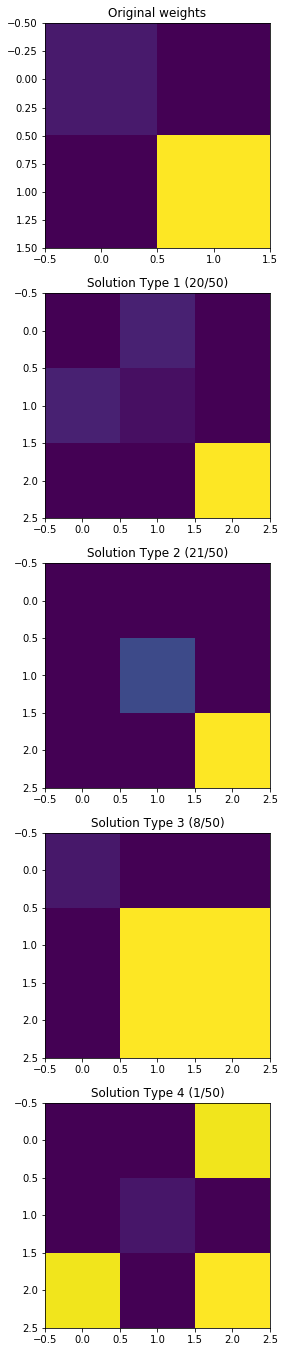

In [448]:
plt.figure(figsize=(8, 6 * len(groups)))
ax = plt.subplot(5, 1, 1)
ax.imshow(sort_weights(bulk_weights_diag[0])[0])
ax.set_title("Original weights")

for i, g in enumerate(groups):
    ax = plt.subplot(5, 1, 2 + i)
    ax.imshow(sort_weights(g['rep'])[0])
    ax.set_title(f"Solution Type {i+1} ({g['count']}/{len(fit_bulk_weights_fake_3statesk_weights)})")
plt.show()

In [508]:
for g in groups:
    ids = g['ids']
    print(compose(partial(np.std, axis=0), np.array, list, map(operator.methodcaller('flatten')), pluck(0), get(ids))(fit_bulk_weights_fake_3states_sorted))

[1.73472348e-18 1.73472348e-18 3.33066907e-16 5.55111512e-17
 5.55111512e-17 1.73472348e-18 1.73472348e-18 1.73472348e-18
 3.33066907e-16 1.73472348e-18 1.73472348e-18 3.33066907e-16
 1.73472348e-18 1.73472348e-18 3.33066907e-16 1.73472348e-18
 1.73472348e-18 3.33066907e-16 5.55111512e-17 5.55111512e-17
 1.66840362e-18 1.73472348e-18 1.73472348e-18 3.33066907e-16
 5.55111512e-17 5.55111512e-17 2.43016123e-18 5.55111512e-17
 5.55111512e-17 1.70188662e-18]
[1.73472348e-18 1.73472348e-18 4.44089210e-16 5.55111512e-17
 5.55111512e-17 1.73472348e-18 1.73472348e-18 1.73472348e-18
 4.44089210e-16 1.73472348e-18 1.85449740e-18 4.44089210e-16
 1.73472348e-18 1.73472348e-18 4.44089210e-16 1.73472348e-18
 1.73472348e-18 4.44089210e-16 5.55111512e-17 5.55111512e-17
 2.53937515e-18 1.73472348e-18 1.13564309e-18 4.44089210e-16
 5.55111512e-17 5.55111512e-17 1.73472348e-18 5.55111512e-17
 5.55111512e-17 1.73472348e-18]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.839

In [511]:
w = fit_bulk_weights_fake_3states[0][0][1]
w

array([[0.03866712, 0.00776212, 0.07703638],
       [0.00776212, 0.76844955, 0.00776212],
       [0.07703638, 0.00776212, 0.00776212]])

In [540]:
P = np.array([[0, 1, 0], [0, 0, 1], [1, 0, 0]])
P.T @ w @ P

array([[0.00776212, 0.07703638, 0.00776212],
       [0.07703638, 0.03866712, 0.00776212],
       [0.00776212, 0.00776212, 0.76844955]])

In [537]:
fit_bulk_weights_fake_3states[0][0][0] @ P

array([[0.00990099, 0.00990099, 0.98019802],
       [0.49748744, 0.49748744, 0.00502513],
       [0.00990099, 0.00990099, 0.98019802],
       [0.00990099, 0.00990099, 0.98019802],
       [0.00990099, 0.00990099, 0.98019802],
       [0.00990099, 0.00990099, 0.98019802],
       [0.49748744, 0.49748744, 0.00502513],
       [0.00990099, 0.00990099, 0.98019802],
       [0.49748744, 0.49748744, 0.00502513],
       [0.49748744, 0.49748744, 0.00502513]])

In [542]:
sort_weights(fit_bulk_weights_fake_3states[0][0][1])

(array([[0.00776212, 0.07703638, 0.00776212],
        [0.07703638, 0.03866712, 0.00776212],
        [0.00776212, 0.00776212, 0.76844955]]), array([2, 0, 1]))

In [543]:
P.T @ P

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [496]:
fit_bulk_weights_fake_3states[0][0]

(array([[0.00990099, 0.98019802, 0.00990099],
        [0.49748744, 0.00502513, 0.49748744],
        [0.00990099, 0.98019802, 0.00990099],
        [0.00990099, 0.98019802, 0.00990099],
        [0.00990099, 0.98019802, 0.00990099],
        [0.00990099, 0.98019802, 0.00990099],
        [0.49748744, 0.00502513, 0.49748744],
        [0.00990099, 0.98019802, 0.00990099],
        [0.49748744, 0.00502513, 0.49748744],
        [0.49748744, 0.00502513, 0.49748744]]),
 array([[0.03866712, 0.00776212, 0.07703638],
        [0.00776212, 0.76844955, 0.00776212],
        [0.07703638, 0.00776212, 0.00776212]]),
 -0.9253181784346582)

In [545]:
np.linalg.eig(P)

(array([-0.5+0.8660254j, -0.5-0.8660254j,  1. +0.j       ]),
 array([[ 0.57735027+0.j ,  0.57735027-0.j , -0.57735027+0.j ],
        [-0.28867513+0.5j, -0.28867513-0.5j, -0.57735027+0.j ],
        [-0.28867513-0.5j, -0.28867513+0.5j, -0.57735027+0.j ]]))

In [550]:
v = np.array([[1, 1, 1], [0, np.complex(1, 1) , 0], [0, np.complex(1, -1), 0]]).T

In [569]:
fit_bulk_weights_fake_3states[0][0][0] @ np.real_if_close(v/np.sqrt(3) @ np.diag([1, np.complex(1, -1), np.complex(1, -1)]) @ v.T/np.sqrt(3))

array([[0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333],
       [0.33333333, 0.33333333, 0.33333333]])

In [568]:
np.real_if_close(v/np.sqrt(3) @ np.diag([1, np.complex(1, -1), np.complex(1, -1)]) @ v.T/np.sqrt(3)).dot([1,1,1])

array([1., 1., 1.])

In [634]:
np.diag(np.concatenate([[0], np.ones(2)]))

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [639]:
a = lambda n, v:  np.diag(np.concatenate([[0], np.ones(n-1)]))

In [641]:
a(4, 0)

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [642]:
import time
time.sleep(10)

In [644]:
3

3